In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score, f1_score, classification_report

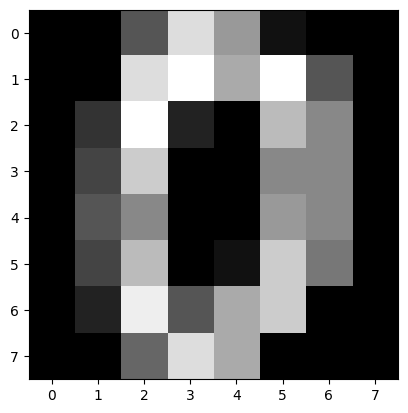

In [2]:
#loading digits dataset
from sklearn.datasets import load_digits
data_set = load_digits()
plt.imshow(data_set.images[0], cmap='gray')
plt.show()

In [3]:
#checking for dataset's properties
df = pd.DataFrame(data_set.data, columns=data_set.feature_names)
dir(data_set)

#selecting features and target
X = df.loc[:, data_set.feature_names].values
Y = data_set.target

#spliting traing and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=72)

#scaling the data for max number of iterations
scaler_lr = StandardScaler()
X_train = scaler_lr.fit_transform(X_train)
X_test = scaler_lr.transform(X_test)

#fit the model
model_lr = LogisticRegression(max_iter=1000) #(Madecraft and Galarnyk M., 2020)(Geron, 2017)
model_lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [4]:
#model prediction & evaluation
pred_lr = model_lr.predict(X_test)
bal_acc_lr = balanced_accuracy_score(Y_test, pred_lr) #measuring balanced accuracy (SCIKIT,2025)
f1_check_lr = f1_score(Y_test, pred_lr, average="weighted") #measuring F1 score (SCIKIT,2025)

print("Accuracy based on default parameters LR:", bal_acc_lr)
print("\nF1 score based on default parameters of LR:", f1_check_lr)

Accuracy based on default parameters LR: 0.9691643488803308

F1 score based on default parameters of LR: 0.9693485280138984


In [12]:
#Hypertuning parameters for Logistic Regression (SCIKIT,2025)(Geron, 2017)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "solver": ["liblinear", "lbfgs", "saga"],
    "max_iter": [100, 200, 500],

}

grid_search_lr = GridSearchCV(model_lr, param_grid= param_grid, cv=5, verbose=True) #modified
grid_search_lr.fit(X_train, Y_train)

print("Best parameters:", grid_search_lr.best_params_)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

KeyboardInterrupt: 

In [ ]:
#Predicting classes for digits dataset with optimal set of parameters
optimal_model = grid_search_lr.best_estimator_
optimal_pred_lr = optimal_model.predict(X_test)
print("Accuracy based on optimal parameters:", balanced_accuracy_score(Y_test, optimal_pred_lr))

Accuracy based on optimal parameters: 0.971603373270575


# The accuracy has improved by approximately 0.0073170731707318 by hyperparameter tuning.